In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns

In [3]:
df = pd.read_csv('customer_purchase_data.csv')
df.sample(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
966,41,1,102836.191985,6,2,2.130905,1,5,1
157,49,1,135205.451460,20,3,6.459185,0,0,0
1160,30,1,131433.303410,1,4,8.409344,0,0,0
529,26,0,52560.826843,16,1,29.145845,1,4,1
261,28,0,55151.127230,17,1,34.017394,1,0,1
1062,29,1,110297.405543,19,1,20.528525,1,3,1
483,49,0,52068.252388,9,1,28.006885,0,3,0
203,58,1,122052.150699,17,4,21.254757,0,2,0
643,50,0,87926.323541,19,3,41.613100,0,4,1
1113,25,1,96745.199760,5,1,37.822692,0,0,0


In [6]:
df.PurchaseStatus.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [10]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [12]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

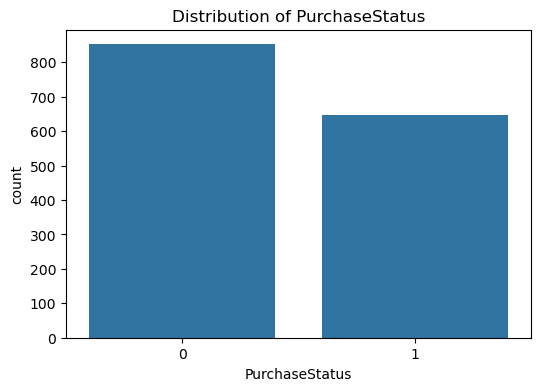

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='PurchaseStatus', data=df )
plt.title('Distribution of PurchaseStatus')
plt.show()

In [16]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [18]:
df.duplicated().sum()

112

In [20]:
df.drop_duplicates()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [22]:
# Step 1: Load your dataset
# drop y
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [24]:
#แบ่งข้อมูล train 70 test 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
485,51,1,22848.732741,11,4,49.936303,1,3
527,56,0,38271.885785,13,4,42.488787,1,2
199,22,0,87622.086000,2,1,24.942913,0,2
889,23,0,142301.987665,6,4,48.599910,0,5
844,27,0,56955.632081,3,1,50.367051,0,0
...,...,...,...,...,...,...,...,...
1130,66,1,141127.983526,0,1,1.128864,0,3
1294,57,1,117678.761184,10,0,30.935996,0,4
860,23,0,22485.092276,10,2,31.839858,0,3
1459,18,0,99007.775893,10,1,16.263599,0,3


In [26]:
#วิธีการ SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [28]:
#USE DBSCAN
k = int(np.log(len(X_res)))
neighbors = NearestNeighbors(n_neighbors=k).fit(X_res)
distances, indices = neighbors.kneighbors(X_res)
eps = np.percentile(distances[:, k-1], 95)

In [30]:
# Apply DBSCAN to find and remove noise
dbscan = DBSCAN(eps=eps, min_samples=k).fit(X_res)
X_clean = X_res[dbscan.labels_ != -1]
y_clean = y_res[dbscan.labels_ != -1]

In [32]:
X_clean.shape

(1182, 8)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[220  37]
 [ 28 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       257
           1       0.82      0.85      0.84       193

    accuracy                           0.86       450
   macro avg       0.85      0.86      0.85       450
weighted avg       0.86      0.86      0.86       450

Accuracy: 0.8556
Precision: 0.8168
Recall: 0.8549
AUC: 0.9227


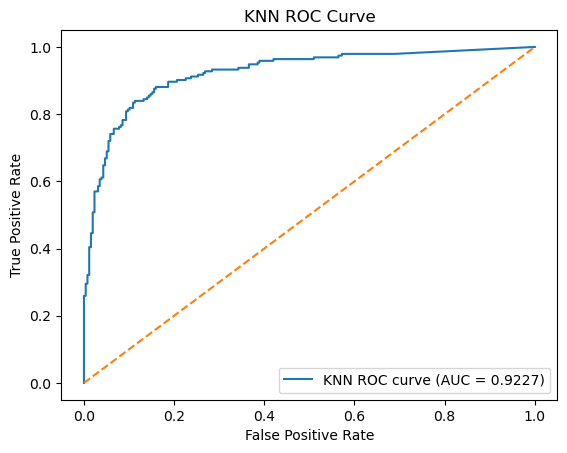

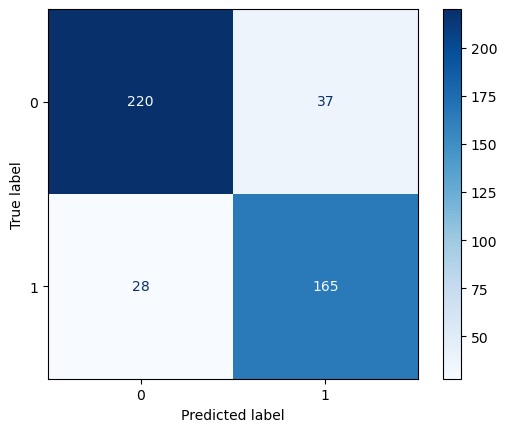

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the parameter grid for KNN
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
                  'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
                  'knn__metric': ['euclidean', 'manhattan']}  # Distance metric

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('knn', KNeighborsClassifier())  # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_res, y_res)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)


Confusion Matrix:
[[239  18]
 [ 37 156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       257
           1       0.90      0.81      0.85       193

    accuracy                           0.88       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.88      0.88      0.88       450

Accuracy: 0.8778
Precision: 0.8966
Recall: 0.8083
AUC: 0.9206


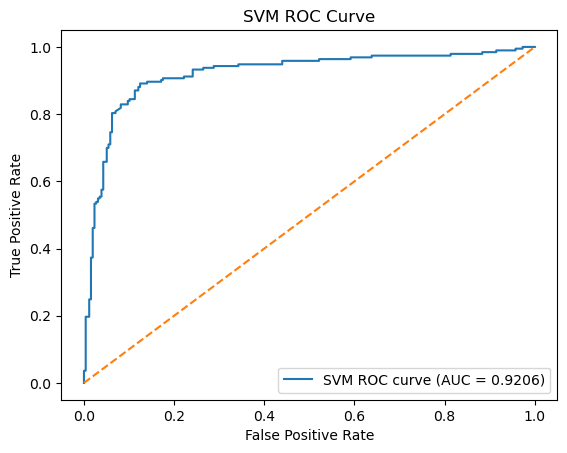

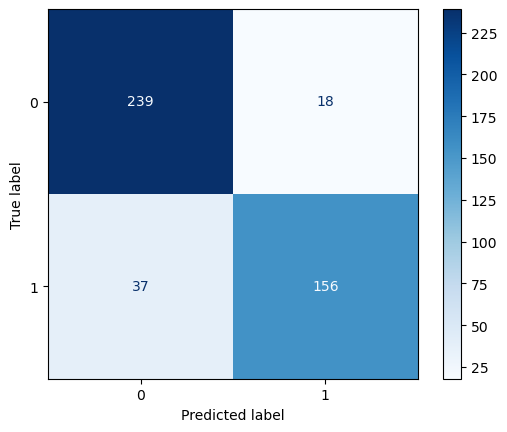

Best parameters found by GridSearchCV:
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train, y_train)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[239  18]
 [ 51 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       257
           1       0.89      0.74      0.80       193

    accuracy                           0.85       450
   macro avg       0.86      0.83      0.84       450
weighted avg       0.85      0.85      0.84       450

Accuracy: 0.8467
Precision: 0.8875
Recall: 0.7358
AUC: 0.9113


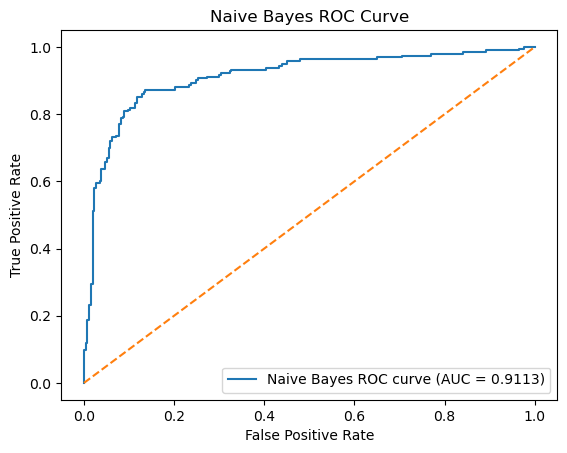

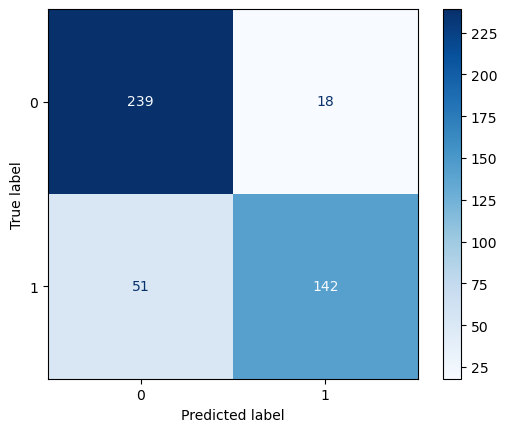

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train, y_train)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()



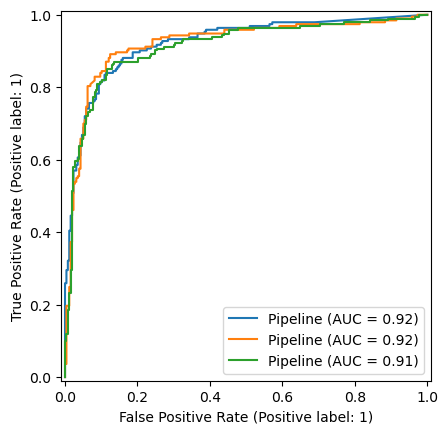

In [50]:
# ROC curve for all models
plt_roc = RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
RocCurveDisplay.from_estimator(svm_best, X_test, y_test, ax=plt_roc.ax_)
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_roc.ax_)
plt.show()

In [60]:
print(X_test)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
1116   42       1   68609.736112                 12                3   
1368   63       0   85623.427780                 18                0   
422    22       1   51251.858676                  4                1   
413    39       1   32791.434463                 18                2   
451    39       1   75573.659430                 12                4   
...   ...     ...            ...                ...              ...   
1083   49       1   74308.927306                 13                1   
990    18       0   47643.768928                 15                0   
650    21       1  120794.999552                 10                0   
1188   22       0   34919.953343                 15                0   
1498   63       0  134021.775532                 16                2   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  
1116           23.396362               1                 5  
1368         